# Machine Learning
## Cluster Analysis
###### Por: Ricardo Reis

###### Case - Iris


#### Carrega Pacotes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Para padronização dos dados
from sklearn.preprocessing import StandardScaler

# Dados
from sklearn import datasets

# Algoritmo
from sklearn.cluster import KMeans

#### Carrega do Dataset

In [27]:
iris = datasets.load_iris()

In [18]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [28]:
features = pd.DataFrame(data = iris.data, columns = iris.feature_names)
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
target = pd.DataFrame(iris.target)
target

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


#### Data Prep

**Renomeando as Colunas**

In [30]:
features = features.rename(
    columns = {
        "sepal length (cm)" : "sepal_length",
        "sepal width (cm)" : "sepal_width",
        "petal length (cm)" : "petal_length",
        "petal width (cm)" : "petal_width"
    }
)

**Verificando Correlação**

In [31]:
features.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [32]:
features = features.drop(['sepal_length','petal_length'], 1)

In [33]:
features.corr()

,sepal_width,petal_width
sepal_width,1.000000,-0.366126
petal_width,-0.366126,1.000000


**Normalizando os Dados**

In [34]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#### K-means

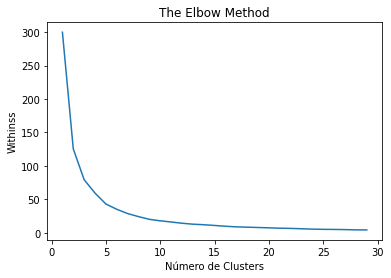

In [35]:
withinss = []

for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features_scaled)
    withinss.append(kmeans.inertia_)
    
# Plot do within sum of square 
plt.plot(range(1, 30), withinss)
plt.title('The Elbow Method')
plt.xlabel('Número de Clusters')
plt.ylabel('Withinss')
plt.show()

In [46]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit(features_scaled)

In [47]:
y_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [38]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Plot do Resultado

In [40]:
cores = np.array(['red','green','blue'])

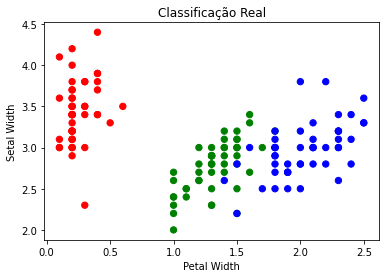

In [44]:
plt.scatter(features.petal_width, features.sepal_width,c=cores[iris.target],s=40)
plt.title('Classificação Real')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()

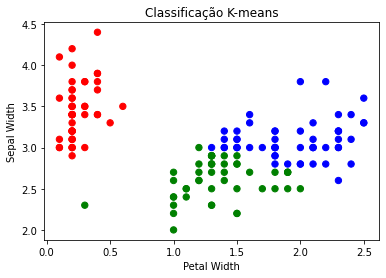

In [48]:
plt.scatter(features.petal_width, features.sepal_width,c=cores[y_kmeans.labels_],s=40)
plt.title('Classificação K-means')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()